In [1]:
from networks_classi import *
from utils_train import *

In [2]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
import torch.nn.functional as F

In [3]:
path = '/media/Data2/avani.gupta/fc/'
os.listdir(path)

['mapped_2',
 'debiased_studentstudent_space_mnist',
 'dino_mapped_to_stu_space_mnist',
 'student_space_mnist',
 'direct_dino_pca_space_mnist']

In [4]:
teacher_cav_files = glob.glob(path+'direct_dino_pca_space_mnist/*')
teacher_cav_files

['/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color9_cons_randoms0.9666666666666667fc.pt',
 '/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color0_cons_randoms0.9833333333333333fc.pt',
 '/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color2_cons_randoms0.9666666666666667fc.pt',
 '/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color7_cons_randoms1.0fc.pt',
 '/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color3_cons_randoms0.9833333333333333fc.pt',
 '/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color8_cons_randoms0.9833333333333333fc.pt',
 '/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color5_cons_randoms1.0fc.pt',
 '/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color0_cons_randoms1.0fc.pt',
 '/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color4_cons_randoms0.9833333333333333fc.pt',
 '/media/Data2/avani.gupta/fc/direct_dino_pca_space_mni

In [5]:
teacher_direc_mean = torch.load('/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color0_cons_randoms1.0fc.pt')['weight'][0]
teacher_direc_mean.shape

torch.Size([576])

In [6]:
x_numpy_train = np.load(os.path.join("dep/data/ColorMNIST", "train_x.npy"))
mean = x_numpy_train.mean(axis = (0,2,3))
std = x_numpy_train.std(axis = (0,2,3))
    
def load_dataset(name, path='dep/'):
    x_numpy = np.load(os.path.join(path+"data/ColorMNIST", name + "_x.npy"))
    if x_numpy.max() > 1:
        x_numpy /= 255.0
#     x_numpy -= mean[None, :, None, None,]
#     x_numpy /= std[None, :, None, None,]
    y_numpy = np.load(os.path.join(path+"data/ColorMNIST", name +"_y.npy"))
    return x_numpy, y_numpy  ##transform back by *std + mean
#     x_tensor = torch.Tensor(x_numpy)
#     y_tensor = torch.Tensor(y_numpy).type(torch.int64)
#     dataset = tutils.TensorDataset(x_tensor,y_tensor) 
#     return dataset, x_tensor, y_tensor

num_imgs = 150

In [7]:
## map these activations to teacher space
from zero_save_dino_outs import *

### save concept imgs:
red, red zeros, other color zeros, red non-zero digits 

In [8]:
import torch
import torchvision
import torchvision.datasets as datasets
import sys
import numpy as np
import torch.utils.data as utils
from tqdm import tqdm
from colour import Color
import os
from os.path import join as oj
np.random.seed(0)
red = Color("red")
colors = list(red.range_to(Color("purple"),10))
colors = [np.asarray(x.get_rgb()) for x in colors]


mnist_trainset = datasets.MNIST(root='../../data', train=True, download=True, transform=None)
num_train = int(len(mnist_trainset)*.9)
num_val = len(mnist_trainset)  - num_train 
torch.manual_seed(0)
train_dataset, val_dataset,= torch.utils.data.random_split(mnist_trainset, [num_train, num_val])


num_samples = len(val_dataset)
color_x = np.zeros((num_samples, 3, 28, 28), dtype = np.float32)
color_y = np.empty(num_samples, dtype = np.int16)
for i in tqdm(range(num_samples)):
    my_color  = colors[0]
    color_x[i] = val_dataset.dataset.data[val_dataset.indices[i]].numpy().astype(np.float32)[np.newaxis]*my_color[:, None, None]
    color_y[i] = val_dataset.dataset.targets[val_dataset.indices[i]]
# os.makedirs("../../data/ColorMNIST", exist_ok = True)
# np.save(oj("../../data/ColorMNIST", "val_x.npy"), color_x)
# np.save(oj("../../data/ColorMNIST", "val_y.npy"), color_y)
color_x.shape

100%|██████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 45947.52it/s]


(6000, 3, 28, 28)

In [20]:
colors

[array([1., 0., 0.]),
 array([0.94466231, 0.52481239, 0.        ]),
 array([0.79051077, 0.88932462, 0.        ]),
 array([0.27799564, 0.83398693, 0.        ]),
 array([0.        , 0.77864924, 0.17303316]),
 array([0.        , 0.72331155, 0.56257565]),
 array([0.        , 0.4453159 , 0.66797386]),
 array([0.        , 0.06807069, 0.61263617]),
 array([0.24768821, 0.        , 0.55729847]),
 array([0.50196078, 0.        , 0.50196078])]

In [25]:
colors[random.randint(0,len(colors))]

array([1., 0., 0.])

In [27]:
num_samples = len(val_dataset)
color_x = np.zeros((num_samples, 3, 28, 28), dtype = np.float32)
color_y = np.empty(num_samples, dtype = np.int16)
for i in tqdm(range(num_samples)):
    
    my_color  = colors[random.randint(0,len(colors)-1)]
    color_x[i] = val_dataset.dataset.data[val_dataset.indices[i]].numpy().astype(np.float32)[np.newaxis]*my_color[:, None, None]
    color_y[i] = val_dataset.dataset.targets[val_dataset.indices[i]]

100%|██████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 33530.92it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 1000 is out of bounds for axis 0 with size 649

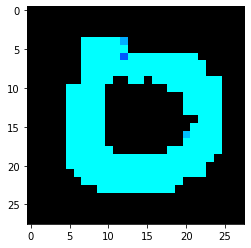

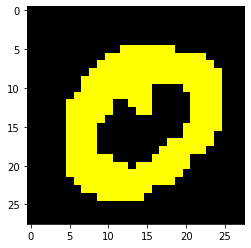

In [41]:
# ind = np.where(color_y==0)[0]
# zeros_other_color = color_x[ind]

i = 0
im = np.transpose(zeros_other_color[0], (1,2,0))
plt.figure()
plt.imshow(im)

im = np.transpose(zeros_other_color[10], (1,2,0))
plt.figure()
plt.imshow(im)

im = np.transpose(zeros_other_color[1000], (1,2,0))
plt.figure()
plt.imshow(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


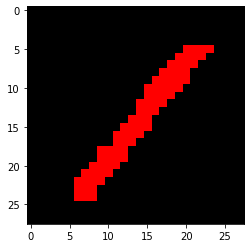

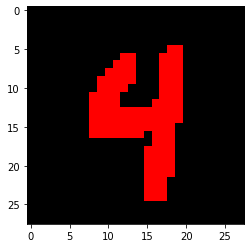

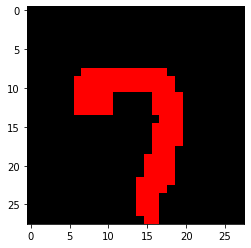

In [9]:
ind = np.where(color_y!=0)[0]
non_zeros_red = color_x[ind]

i = 0
im = np.transpose(non_zeros_red[0], (1,2,0))
plt.figure()
plt.imshow(im)

im = np.transpose(non_zeros_red[10], (1,2,0))
plt.figure()
plt.imshow(im)

im = np.transpose(non_zeros_red[1003], (1,2,0))
plt.figure()
plt.imshow(im)

In [10]:
model = MNISTColorNet()
# model.load_state_dict(torch.load('mnist/ColorMNIST/orig_model_colorMNIST.pt'))
# model.eval().cuda()
# bottleneck_name = 'conv2'
bottleneck_name = 'conv2'
model_type = 'colormnist'
shape = (28,28)
concepts = ['red','red_zeros','other_color_zeros','other_color_digits','non_zeros_red','non_red_zeros']

def save_student_outs(con, imgs, prefix="debiased_student"):
    save_path = f"/media/Data2/avani.gupta/{prefix}acts_"+model_type+bottleneck_name+'/'
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    bn_activation = None
    acts = []
    for im in imgs[:num_imgs]:
        def save_activation_hook(mod, inp, out):
            global bn_activation
            bn_activation = out
        im = torch.from_numpy(im)
        handle = named_layers[bottleneck_name].register_forward_hook(save_activation_hook)
        out = model(im.unsqueeze(0).cuda().float())
        act = bn_activation.detach()
        acts.append(act)
        handle.remove()
    acts = torch.concat(acts,axis=0)
    torch.save(acts,save_path+con+'all.pt')
    print("acts",acts.shape)
    print(f"saved {acts.shape} to {save_path+con+'all.pt'}")
    


In [52]:
model = MNISTColorNet()
model.load_state_dict(torch.load('/media/Data2/avani.gupta/acc46.03best_val_acc45.28highest_epoch0iter0colormnistmnistp8nimg150lr0.01rr0.3wtcav5bs44pwt0.3upr1cd1precalc1up1scratch0uknn1cwt0s42corr'))
prefix = 'debiased_student'
named_layers = dict(model.named_modules())
# model.load_state_dict(torch.load('mnist/ColorMNIST/orig_model_colorMNIST.pt'))
model.eval().cuda()

MNISTColorNet(
  (conv1): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

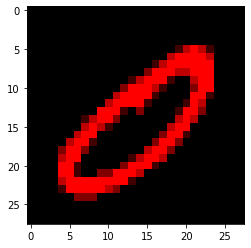

In [84]:
train_x,train_y = load_dataset("train")
zeros_ind = np.where(train_y==0)[0]
zeros_imgs = train_x[zeros_ind]
i = 0
im = np.transpose(zeros_imgs[0], (1,2,0))
plt.imshow(im)
# print(im)

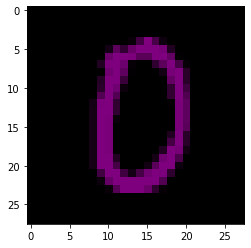

In [51]:
# train_x,train_y = load_dataset("test")
# zeros_ind = np.where(train_y==0)[0]
# zeros_imgs = train_x[zeros_ind]
# i = 0
im = np.transpose(zeros_imgs[10], (1,2,0)) ##negative red zeros
plt.imshow(im)
# print(im)

In [53]:
prefix = 'debiased_student'
imgs = zeros_imgs
con = 'opp_zeros'
save_path = f"/media/Data2/avani.gupta/{prefix}acts_"+model_type+bottleneck_name+'/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
bn_activation = None
acts = []
for im in imgs[:num_imgs]:
    def save_activation_hook(mod, inp, out):
        global bn_activation
        bn_activation = out
    im = torch.from_numpy(im)
    handle = named_layers[bottleneck_name].register_forward_hook(save_activation_hook)
    out = model(im.unsqueeze(0).cuda().float())
    act = bn_activation.detach()
    acts.append(act)
    handle.remove()
acts = torch.concat(acts,axis=0)
torch.save(acts,save_path+con+'all.pt')
print("acts",acts.shape)
print(f"saved {acts.shape} to {save_path+con+'all.pt'}")

acts torch.Size([150, 50, 8, 8])
saved torch.Size([150, 50, 8, 8]) to /media/Data2/avani.gupta/debiased_studentacts_colormnistconv2/opp_zerosall.pt


In [54]:
# prefix = ''
imgs = zeros_other_color
con = 'zeros_other_color'
save_path = f"/media/Data2/avani.gupta/{prefix}acts_"+model_type+bottleneck_name+'/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
bn_activation = None
acts = []
for im in imgs[:num_imgs]:
    def save_activation_hook(mod, inp, out):
        global bn_activation
        bn_activation = out
    im = torch.from_numpy(im)
    handle = named_layers[bottleneck_name].register_forward_hook(save_activation_hook)
    out = model(im.unsqueeze(0).cuda().float())
    act = bn_activation.detach()
    acts.append(act)
    handle.remove()
acts = torch.concat(acts,axis=0)
torch.save(acts,save_path+con+'all.pt')
print("acts",acts.shape)
print(f"saved {acts.shape} to {save_path+con+'all.pt'}")

acts torch.Size([150, 50, 8, 8])
saved torch.Size([150, 50, 8, 8]) to /media/Data2/avani.gupta/debiased_studentacts_colormnistconv2/zeros_other_colorall.pt


In [22]:
save_student_outs('non_zeros_red',non_zeros_red[:150])

AttributeError: 'NoneType' object has no attribute 'detach'

In [86]:
save_im_path = '/media/Data2/avani.gupta/imgs_np_'+f"{shape[0]}by{shape[1]}/"
imgs = np.transpose(np.load(save_im_path+'biased_color0.npy'), (0,3,1,2))
save_student_outs(con='red', imgs=imgs)


acts torch.Size([150, 50, 8, 8])
saved torch.Size([150, 50, 8, 8]) to /media/Data2/avani.gupta/debiased_studentacts_colormnistconv2/redall.pt


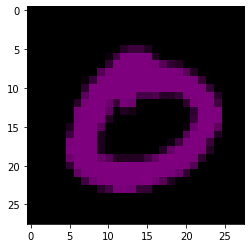

In [87]:
test_x,test_y = load_dataset("test")
zeros_ind = np.where(test_y==0)[0]
zeros_imgs = test_x[zeros_ind]
im = np.transpose(zeros_imgs[random.randint(0, len(zeros_imgs))], (1,2,0))
plt.imshow(im)


In [88]:
save_student_outs(con='other_color_zeros', imgs=zeros_imgs)



acts torch.Size([150, 50, 8, 8])
saved torch.Size([150, 50, 8, 8]) to /media/Data2/avani.gupta/debiased_studentacts_colormnistconv2/other_color_zerosall.pt


acts torch.Size([150, 50, 8, 8])
saved torch.Size([150, 50, 8, 8]) to /media/Data2/avani.gupta/debiased_studentacts_colormnistconv2/other_color_digitsall.pt


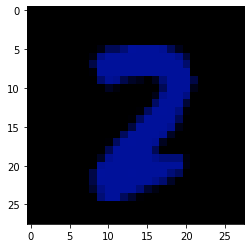

In [89]:

zeros_ind = np.where(test_y!=0)[0]
zeros_imgs = test_x[zeros_ind]
i = 0
im = np.transpose(zeros_imgs[random.randint(0, len(zeros_imgs))], (1,2,0))
plt.imshow(im)

save_student_outs(con='other_color_digits', imgs=zeros_imgs)

In [39]:
path_fea = '/media/Data2/avani.gupta/dino_fea_'+f"{shape[0]}by{shape[1]}/"
con = 'red_zeros'

def dump_dino_fea(model, con, imgs):
    fea_maps = []
    for i in imgs[:num_imgs]:
        i = torch.from_numpy(i).unsqueeze(0).float()
        fea = model.extract_features(i.cuda(), transform=False, upsample=False)
        fea_maps.append(fea.detach().cpu())
    all_features = torch.cat(fea_maps,0)

    pca = PCA(n_components=args.pca)
    N, C, H, W = all_features.shape
    all_features = all_features.permute(0, 2, 3, 1).view(-1, C).numpy()
    print("Features shape: ", all_features.shape)
    X = pca.fit_transform(all_features)
    print("Features shape (PCA): ", X.shape)
    X = torch.Tensor(X).view(N, H, W, args.pca).permute(0, 3, 1, 2)
    scene_id = os.path.split(os.path.split(args.dir_images)[0])[1]
    output_path_pca = os.path.join(args.dir_dst, f"pca{args.pca}", f"{scene_id}.pt")
    print(f'Saving features to {path_fea+con}')
    torch.save(X,path_fea+con+'all.pt')


In [40]:
import sys
sys.argv = [""]
args = parse_args()
shape = args.imsize
model = get_model(args.model, args.model_path, f"cuda:{args.gpu}")


Pretrained weights loaded with msg: <All keys matched successfully>


In [ ]:
plt.imshow()

zeros_imgs, zeros_other_color  <BR>
opp_zeros, zeros_other_color

In [43]:
dump_dino_fea(model, 'opp_zeros',zeros_imgs[:150])

Features shape:  (1350, 768)
Features shape (PCA):  (1350, 64)
Saving features to /media/Data2/avani.gupta/dino_fea_28by28/opp_zeros


In [44]:
dump_dino_fea(model, 'zeros_other_color', zeros_other_color[:150])

Features shape:  (1350, 768)
Features shape (PCA):  (1350, 64)
Saving features to /media/Data2/avani.gupta/dino_fea_28by28/zeros_other_color


Features shape:  (1350, 768)
Features shape (PCA):  (1350, 64)
Saving features to /media/Data2/avani.gupta/dino_fea_28by28/red_zeros


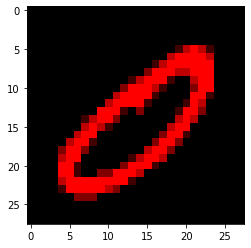

In [21]:
train_x,train_y = load_dataset("train")
zeros_ind = np.where(train_y==0)[0]
zeros_imgs = train_x[zeros_ind]
i = 0
im = np.transpose(zeros_imgs[0], (1,2,0))
plt.imshow(im)

dump_dino_fea(model, con, zeros_imgs)

In [22]:
save_im_path = '/media/Data2/avani.gupta/imgs_np_'+f"{shape[0]}by{shape[1]}/"
imgs = np.transpose(np.load(save_im_path+'biased_color0.npy'), (0,3,1,2))
dump_dino_fea(model, con='red', imgs=imgs)

Features shape:  (1350, 768)
Features shape (PCA):  (1350, 64)
Saving features to /media/Data2/avani.gupta/dino_fea_28by28/red


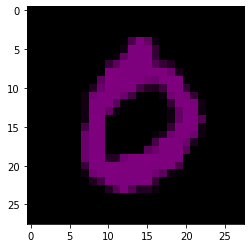

In [23]:
test_x,test_y = load_dataset("test")
zeros_ind = np.where(test_y==0)[0]
zeros_imgs = test_x[zeros_ind]
i = 0
im = np.transpose(zeros_imgs[0], (1,2,0))
plt.imshow(im)

In [24]:
dump_dino_fea(model, con='other_color_zeros', imgs=zeros_imgs)

Features shape:  (1350, 768)
Features shape (PCA):  (1350, 64)
Saving features to /media/Data2/avani.gupta/dino_fea_28by28/other_color_zeros


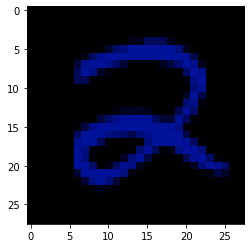

In [25]:

zeros_ind = np.where(test_y!=0)[0]
zeros_imgs = test_x[zeros_ind]
i = 0
im = np.transpose(zeros_imgs[random.randint(0, len(zeros_imgs))], (1,2,0))
plt.imshow(im)

In [26]:
dump_dino_fea(model, con='other_color_digits', imgs=zeros_imgs)

Features shape:  (1350, 768)
Features shape (PCA):  (1350, 64)
Saving features to /media/Data2/avani.gupta/dino_fea_28by28/other_color_digits


### Sort CAVs

In [46]:
concepts = ['red',
 'red_zeros',
 'other_color_zeros',
 'other_color_digits',
 'non_zeros_red',
 'opp_zeros',
'zeros_other_color']

In [59]:
print("teacher")
dic_all = { 'teacher':{},'mapped_teacher':{}, 'student':{}, 'debiased_student':{}}

first = True
for con in concepts:
    direc_mean = torch.load('/media/Data2/avani.gupta/fc/direct_dino_pca_space_mnist/biased_color0_cons_randoms1.0fc.pt')['weight'][0]
    acts = torch.load(path_fea + con + 'all.pt')
    print(acts.shape)
    if first:
        print(acts.shape)
        first = False
    cosine_sim_lis = []
    

    for i in acts:
        cosine_sim = F.cosine_similarity(direc_mean.cpu().unsqueeze(0), i.flatten().unsqueeze(0), dim=0)
        cosine_sim_lis.append(cosine_sim)

    mean_cosine_sim = torch.mean(torch.stack(cosine_sim_lis)).item()
    dic_all['teacher'][con] = mean_cosine_sim
    
    print(f"{con}: Mean CS:", mean_cosine_sim)

teacher
torch.Size([150, 64, 3, 3])
torch.Size([150, 64, 3, 3])
red: Mean CS: 0.08394531160593033
torch.Size([150, 64, 3, 3])
red_zeros: Mean CS: -0.011666666716337204
torch.Size([150, 64, 3, 3])
other_color_zeros: Mean CS: 0.0071527776308357716
torch.Size([150, 64, 3, 3])
other_color_digits: Mean CS: 0.000370370369637385
torch.Size([150, 64, 3, 3])
non_zeros_red: Mean CS: -0.008958333171904087
torch.Size([150, 64, 3, 3])
opp_zeros: Mean CS: 0.00589015381410718
torch.Size([150, 64, 3, 3])
zeros_other_color: Mean CS: 0.0054166666232049465


In [48]:
print("mapped teacher")
map_to_stu_nn = DecoMapMNISTNN()
path = '/media/Data2/avani.gupta/teacher_2/mnistpairs_vals8'
map_to_stu_nn.load_state_dict(torch.load(path+'downconv.pt'))
# map_to_stu_nn.load_state_dict(torch.load('downconv.pt'))
for con in concepts:
    file = glob.glob('/media/Data2/avani.gupta/fc/dino_mapped_to_stu_space_mnist/biased_color0_cons_randoms*')[0]
    direc_mean = torch.load(file)['weight'][0]
    acts = map_to_stu_nn(torch.load(path_fea + con + 'all.pt'))
#     print(acts[0].flatten().shape, direc_mean.shape)
#     break
    cosine_sim_lis = []

    for i in acts:
        cosine_sim = F.cosine_similarity(direc_mean.cpu().unsqueeze(0), i.flatten().unsqueeze(0), dim=0)
        cosine_sim_lis.append(cosine_sim)
        
    mean_cosine_sim = torch.mean(torch.stack(cosine_sim_lis)).item()
    dic_all['mapped_teacher'][con] = mean_cosine_sim
    print(f"{con}: Mean CS:", mean_cosine_sim)
    

mapped teacher
red: Mean CS: 0.26290538907051086
red_zeros: Mean CS: -0.04125833511352539
other_color_zeros: Mean CS: -0.03634536266326904
other_color_digits: Mean CS: 0.04236891120672226
non_zeros_red: Mean CS: 0.014060581102967262
opp_zeros: Mean CS: -0.03660953417420387
zeros_other_color: Mean CS: 0.023604165762662888


In [49]:
print("student")
save_path = '/media/Data2/avani.gupta/acts_colormnistconv2/'
prefix = ''
dset = 'mnist'
# map_to_stu_nn.load_state_dict(torch.load('downconv.pt'))
for con in concepts:
    
    file = glob.glob(f'/media/Data2/avani.gupta/fc/{prefix}student_space_'+dset+'/*')[0]
    direc_mean = torch.load(file)['weight'][0]
    
    acts = torch.load(save_path+f'{con}all.pt')
    cosine_sim_lis = []

    for i in acts:
        cosine_sim = F.cosine_similarity(direc_mean.cpu().unsqueeze(0), i.flatten().cpu().unsqueeze(0), dim=0)
        cosine_sim_lis.append(cosine_sim)
    
    mean_cosine_sim = torch.mean(torch.stack(cosine_sim_lis)).item()
    dic_all['student'][con] = mean_cosine_sim
    
    print(f"{con}: Mean CS:", mean_cosine_sim)

student
red: Mean CS: -0.04568333178758621
red_zeros: Mean CS: -0.04072786495089531
other_color_zeros: Mean CS: -0.03754734992980957
other_color_digits: Mean CS: 0.007559913210570812
non_zeros_red: Mean CS: -0.034191668033599854
opp_zeros: Mean CS: -0.03754734992980957
zeros_other_color: Mean CS: -0.00036249999538995326


In [60]:
print("debiased_student")
prefix = 'debiased_student'
save_path = f'/media/Data2/avani.gupta/{prefix}acts_colormnistconv2/'

dset = 'mnist'
# map_to_stu_nn.load_state_dict(torch.load('downconv.pt'))
for con in concepts:
    
    file = glob.glob(f'/media/Data2/avani.gupta/fc/{prefix}student_space_'+dset+'/*')[0]
    direc_mean = torch.load(file)['weight'][0]
    
    acts = torch.load(save_path+f'{con}all.pt')
    print(acts.shape)
    cosine_sim_lis = []

    for i in acts:
        cosine_sim = F.cosine_similarity(direc_mean.cpu().unsqueeze(0), i.flatten().cpu().unsqueeze(0), dim=0)
        cosine_sim_lis.append(cosine_sim)
    
    mean_cosine_sim = torch.mean(torch.stack(cosine_sim_lis)).item()
    dic_all['debiased_student'][con] = mean_cosine_sim
    
    print(f"{con}: Mean CS:", mean_cosine_sim)

debiased_student
torch.Size([150, 50, 8, 8])
red: Mean CS: -0.019375000149011612
torch.Size([150, 50, 8, 8])
red_zeros: Mean CS: -0.019375000149011612
torch.Size([150, 50, 8, 8])
other_color_zeros: Mean CS: -0.019375000149011612
torch.Size([150, 50, 8, 8])
other_color_digits: Mean CS: -0.019375000149011612
torch.Size([150, 50, 8, 8])
non_zeros_red: Mean CS: -0.019375000149011612
torch.Size([150, 50, 8, 8])
opp_zeros: Mean CS: -0.0015791666228324175
torch.Size([150, 50, 8, 8])
zeros_other_color: Mean CS: -0.004633333534002304


In [56]:
dic_all

{'teacher': {'red': 0.08394531160593033,
  'red_zeros': -0.011666666716337204,
  'other_color_zeros': 0.0071527776308357716,
  'other_color_digits': 0.000370370369637385,
  'non_zeros_red': -0.008958333171904087,
  'opp_zeros': 0.00589015381410718,
  'zeros_other_color': 0.0054166666232049465},
 'mapped_teacher': {'red': 0.26290538907051086,
  'red_zeros': -0.04125833511352539,
  'other_color_zeros': -0.03634536266326904,
  'other_color_digits': 0.04236891120672226,
  'non_zeros_red': 0.014060581102967262,
  'opp_zeros': -0.03660953417420387,
  'zeros_other_color': 0.023604165762662888},
 'student': {'red': -0.04568333178758621,
  'red_zeros': -0.04072786495089531,
  'other_color_zeros': -0.03754734992980957,
  'other_color_digits': 0.007559913210570812,
  'non_zeros_red': -0.034191668033599854,
  'opp_zeros': -0.03754734992980957,
  'zeros_other_color': -0.00036249999538995326},
 'debiased_student': {'red': -0.019375000149011612,
  'red_zeros': -0.019375000149011612,
  'other_color_ze

In [57]:
concepts

['red',
 'red_zeros',
 'other_color_zeros',
 'other_color_digits',
 'non_zeros_red',
 'opp_zeros',
 'zeros_other_color']

In [58]:
for key in dic_all: 
    ar = np.array(list(dic_all[key].values()))
    mean = np.mean(ar)
    std = np.std(ar)
    print('\n',key)#, mean, std)
    print("abs",np.around((ar-mean)/std, 3))
    print("",np.around(ar, 3))


 teacher
abs [ 2.385 -0.773 -0.151 -0.375 -0.684 -0.193 -0.209]
 [ 0.084 -0.012  0.007  0.    -0.009  0.006  0.005]

 mapped_teacher
abs [ 2.326 -0.747 -0.697  0.098 -0.188 -0.7   -0.092]
 [ 0.263 -0.041 -0.036  0.042  0.014 -0.037  0.024]

 student
abs [-0.952 -0.701 -0.539  1.751 -0.369 -0.539  1.349]
 [-0.046 -0.041 -0.038  0.008 -0.034 -0.038 -0.   ]

 debiased_student
abs [-0.629 -0.629 -0.629 -0.629 -0.629  1.778  1.365]
 [-0.019 -0.019 -0.019 -0.019 -0.019 -0.002 -0.005]


In [ ]:
print(dic_all[key].keys())

In [ ]:
abs(1.7064- 1.67405) < abs(1.7064- 1.67405)

In [ ]:
mapping_mod 

In [ ]:
con = ''
path = f'/media/Data2/avani.gupta/imgs_np_{self.shape[0]}by{self.shape[0]}/'
if os.path.exists(path+con+'.npy'):
    imgs = np.load(path+con+'.npy')

In [ ]:
imgs_loaded = []

path = '/media/Data2/avani.gupta/IID_data/concepts/'+con+'/'
print("tot imgs", len(os.listdir(path)))
imgs_con_full = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
num_imgs = int(num_imgs)

for file in imgs_con_full:
    im = load_image_from_file(path+file, shape=shape)
    if len(im)!=0:
        imgs_loaded.append(im)
    else:
        print("could not load",path+file)

In [ ]:
import numpy as np
lis = np.array([0.084, -0.013])
(lis - np.mean(lis))/np.std(lis)